In [1]:
# !pip install numpy
# !pip install graphviz
# !pip install pydotplus
# !pip install dtale

### Notes: 
* Check for Normal Distribution
* Outliers
* Correlation
* Imbalanced Dataset
* Is it possible to predict the values, in place of null

In [2]:
import pandas as pd
# import dtale
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Data Cleaning

In [3]:
# Reading merged data Arabica 98% and Robusta 2% of records
df_quality = pd.read_csv("data/merged_data_cleaned.csv")
df_quality.head()
df_quality['Color'].value_counts()

Green           870
Bluish-Green    114
Blue-Green       85
None             52
Name: Color, dtype: int64

In [4]:
################### Quality Measures ####################
# Aroma
# Flavor
# Aftertaste
# Acidity
# Body
# Balance
# Uniformity
# Cup Cleanliness
# Sweetness
# Moisture
# Defects
################### Bean Metadata ####################
# Processing Method
# Color
# Species (arabica / robusta)
################### Farm Metadata ####################
# Country of Origin
# Altitude

df_quality = df_quality[['Country.of.Origin', 'Altitude', 'Processing.Method', 'Species', 'Color', 'Aroma', 'Flavor',
                         'Aftertaste', 'Acidity', 'Body', 'Balance', 'Uniformity', 'Clean.Cup', 'Sweetness',
                         'Moisture', 'Category.One.Defects', 'Category.Two.Defects']]

Country.of.Origin         1
Altitude                226
Processing.Method       170
Species                   0
Color                   218
Aroma                     0
Flavor                    0
Aftertaste                0
Acidity                   0
Body                      0
Balance                   0
Uniformity                0
Clean.Cup                 0
Sweetness                 0
Moisture                  0
Category.One.Defects      0
Category.Two.Defects      0
dtype: int64

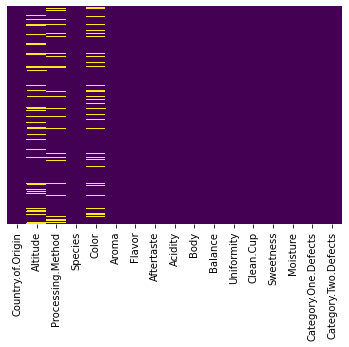

In [5]:
# visualize null values in data
fig = plt.figure()
fig.patch.set_facecolor('white')
sns.heatmap(df_quality.isnull(), yticklabels=False, cbar=False, cmap='viridis')
df_quality.isnull().sum()

In [6]:
# dtale.show(df_quality)

In [7]:
df_quality.describe()

,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean.Cup,Sweetness,Moisture,Category.One.Defects,Category.Two.Defects
count,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000
mean,7.566706,7.520426,7.401083,7.535706,7.517498,7.518013,9.834877,9.835108,9.856692,0.088379,0.479462,3.556385
std,0.377560,0.398442,0.404463,0.379827,0.370064,0.408943,0.554591,0.763946,0.616102,0.048287,2.549683,5.312541
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.420000,7.330000,7.250000,7.330000,7.330000,7.330000,10.000000,10.000000,10.000000,0.090000,0.000000,0.000000
50%,7.580000,7.580000,7.420000,7.580000,7.500000,7.500000,10.000000,10.000000,10.000000,0.110000,0.000000,2.000000
75%,7.750000,7.750000,7.580000,7.750000,7.670000,7.750000,10.000000,10.000000,10.000000,0.120000,0.000000,4.000000
max,8.750000,8.830000,8.670000,8.750000,8.580000,8.750000,10.000000,10.000000,10.000000,0.280000,63.000000,55.000000


C:\Users\Abraham\anaconda3\envs\envcoffee\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Moisture', ylabel='Density'>

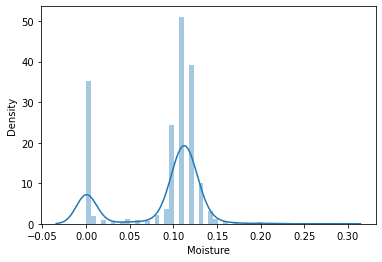

In [8]:
fig = plt.figure()
fig.patch.set_facecolor('white')
sns.distplot(df_quality['Moisture'])

In [9]:
# upper_bound = df_quality['Moisture'].mean() + (3 * df_quality['Moisture'].std())
# lower_bound = df_quality['Moisture'].mean() - (3 * df_quality['Moisture'].std())
# print(lower_bound)
# print(upper_bound)
# df_quality.loc[df_quality['Moisture'] > upper_bound),'Moisture']='0.23'

C:\Users\Abraham\anaconda3\envs\envcoffee\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Uniformity', ylabel='Density'>

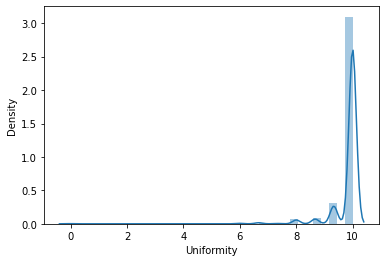

In [10]:
fig = plt.figure()
fig.patch.set_facecolor('white')
sns.distplot(df_quality['Uniformity'])

C:\Users\Abraham\anaconda3\envs\envcoffee\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Clean.Cup', ylabel='Density'>

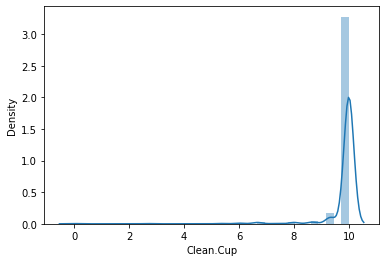

In [11]:
sns.distplot(df_quality['Clean.Cup'])

C:\Users\Abraham\anaconda3\envs\envcoffee\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sweetness', ylabel='Density'>

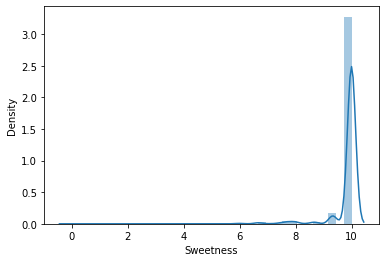

In [12]:
sns.distplot(df_quality['Sweetness'])

<AxesSubplot:>

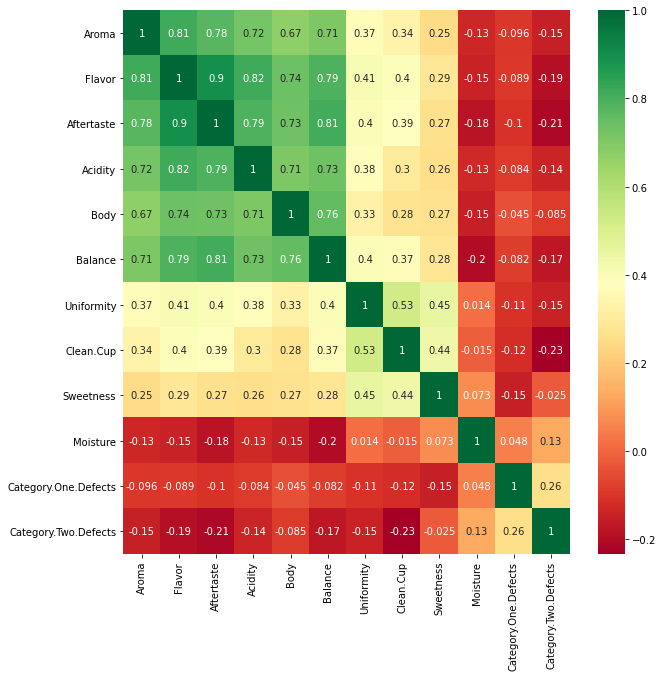

In [13]:
# correlation matrix
corr_mat = df_quality.corr()
top_corr_features = corr_mat.index
fig = plt.figure(figsize=(10,10))
fig.patch.set_facecolor('white')
# heatmap
sns.heatmap(df_quality[top_corr_features].corr(), annot=True, cmap="RdYlGn")

## Select your features (columns)

In [14]:
df_quality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1339 entries, 0 to 1338
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Country.of.Origin     1338 non-null   object 
 1   Altitude              1113 non-null   object 
 2   Processing.Method     1169 non-null   object 
 3   Species               1339 non-null   object 
 4   Color                 1121 non-null   object 
 5   Aroma                 1339 non-null   float64
 6   Flavor                1339 non-null   float64
 7   Aftertaste            1339 non-null   float64
 8   Acidity               1339 non-null   float64
 9   Body                  1339 non-null   float64
 10  Balance               1339 non-null   float64
 11  Uniformity            1339 non-null   float64
 12  Clean.Cup             1339 non-null   float64
 13  Sweetness             1339 non-null   float64
 14  Moisture              1339 non-null   float64
 15  Category.One.Defects 

#### Imbalanced Dataset

In [15]:
df_quality['Species'].value_counts()

Arabica    1311
Robusta      28
Name: Species, dtype: int64

In [16]:
# Set features. This will also be used as your x values.
data = df_quality.values
X = data[:, 5:16]
y = data[:, 3]
print(X.shape, y.shape)

(1339, 11) (1339,)


## Create a Train Test Split

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

## Pre-processing
Scale the data using the MinMaxScaler and perform some feature selection

In [18]:
from sklearn.preprocessing import StandardScaler
# Create a StandardScater model and fit it to the training data
X_scaler = StandardScaler().fit(X_train)

# Transform the training and testing data using the X_scaler
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Train the Model using SVC

In [19]:
# Support vector machine linear classifier
from sklearn.svm import SVC 
model = SVC(kernel='linear')
model.fit(X_train_scaled, y_train)

print(f"Training Data Score: {model.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {model.score(X_test_scaled, y_test)}")

Training Data Score: 0.9981325863678805
Testing Data Score: 0.9738805970149254


## Evaluate the Model

In [20]:
# Make predictions with the hypertuned model
predictions = model.predict(X_test_scaled)  
# Calculate classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions,
                            target_names=["Arabica", "Robusta"]))

              precision    recall  f1-score   support

     Arabica       0.99      0.98      0.99       259
     Robusta       0.60      0.67      0.63         9

    accuracy                           0.97       268
   macro avg       0.79      0.83      0.81       268
weighted avg       0.98      0.97      0.97       268



### Confusion Matrix

Confusion matrix:
 [[255   4]
 [  3   6]]


C:\Users\Abraham\anaconda3\envs\envcoffee\lib\site-packages\ipykernel_launcher.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  if sys.path[0] == '':
C:\Users\Abraham\anaconda3\envs\envcoffee\lib\site-packages\ipykernel_launcher.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  del sys.path[0]


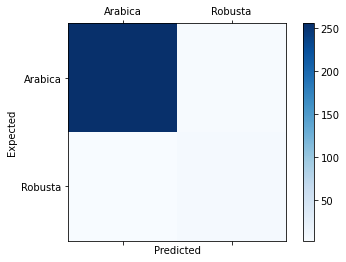

In [21]:
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_true=y_test, y_pred=predictions)
print('Confusion matrix:\n', conf_mat)

labels = ['Arabica', 'Robusta']
fig = plt.figure()
fig.patch.set_facecolor('white')
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

# Decision Tree Model

In [22]:
from sklearn import tree

# Create and score a decision tree classifier
clf = tree.DecisionTreeClassifier()
clf = clf.fit(df_quality.iloc[:, 5:16], df_quality.Species)
clf.score(df_quality.iloc[:, 5:16], df_quality.Species)

1.0

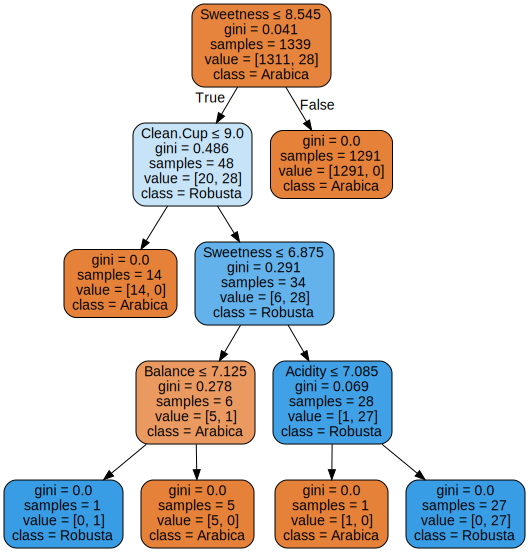

In [23]:
# Create a decision tree graph
import graphviz 
dot_data = tree.export_graphviz(
    clf, out_file=None, 
    feature_names=df_quality.iloc[:, 5:16].columns,  
    class_names=df_quality.Species.unique(),  
    filled=True, rounded=True,  
    special_characters=True)  

import pydotplus
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png('Images/coffee_quality_species.png')

graph = graphviz.Source(dot_data)  
graph 

In [24]:
predictions = clf.predict(X_test_scaled)

df_predictions = pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True)
df_predictions.tail(50)

,Prediction,Actual
218,Arabica,Arabica
219,Arabica,Arabica
220,Arabica,Arabica
221,Arabica,Arabica
222,Arabica,Arabica
223,Arabica,Arabica
224,Arabica,Arabica
225,Arabica,Arabica
226,Arabica,Arabica
227,Arabica,Arabica
